# Final Project

In [1]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import pandas as pd 
from statsmodels.stats.outliers_influence import OLSInfluence 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.stats.mstats import zscore 
%matplotlib inline 

## Problem 1

**Job Proficiency**
A personnel officer in a governmental agency administered four newly developed aptitude tests to each of 25 applicants for entry-level clerical positions in the agency. For purpose of the study, all 25 applicants were accepted for positions irrespective of their test scores. After a probationary period, each applicant was rated for proficiency on the job. The scores on the four tests $(X_1, X_2, X_3, X_4)$ (Columns 2-5) and the job proficiency score ($Y$) (Column 1) for the 25 employees are stored in "JobProficiency.txt".

(A1) Fit the multiple regression function containing all four predictor variables as first-order
terms. Does it appear that all predictor variables should be retained?

(A2) Using forward stepwise regression, find the best subset of predictor variables to predict job
proficiency. Use $\alpha$ limits of $.05$ and $.10$ for adding or deleting a variable, respectively.

(A3) To assess internally the predictive ability of
the regression model identified in (A2). compute the PRESS statistic and compare it
to SSE. What does this comparison suggest about the validity of MSE as an indicator of the
predictive ability of the fitted model?

(B1) To assess externally the validity of the
regression model identified in Part (A2). 25 additional applicants for entry-level clerical
positions in the agency were similarly tested and hired irrespective of their test scores. The data are stored in
JobProficiency_validation.txt. Fit the regression model identified in (A2) to the validation data set. Compare the
estimated regression coefficients and their estimated standard deviations to those obtained
in (A2). Also compare the MSE and coefficients of multiple determination. Do the estimates for the validation data set appear to be reasonably similar to those obtained for the model-building data set?

(B2) Use the model obtained from (A2) to calculate the mean squared prediction error (MSPR) for the validation data and compare it to MSE obtained from
the model-building data set. Is there evidence of a substantial bias problem in MSE here?

(C1) For this question and the following ones, consider that a subset model containing only first-order
terms in $x_1$ and $x_3$ is to be evaluated in detail, and the training data are used. Obtain the studentized deleted residuals and identify any outlying $y$ observations. Use $\alpha=0.05$.

(C2) Obtain the diagonal elements of the hat matrix. Using the rule of thumb discussed in the notes, identify
any outlying $x$ observations.

(C3) For those outlying cases found in (C1) and (C2), obtain DFFITS, DFBETAS
and Cook's distance values for these cases to assess their influence. What do you conclude?

(C4) Obtain the variance inflation factors. What do they indicate?

## (A1)

In [2]:
#Show the data 
df = pd.read_csv('JobProficiency.txt', delim_whitespace=True, 
                 names = ['JobProficiency', 'Test1', 'Test2', 'Test3', 'Test4']) 
n = df.shape[0] 
df.head(n)

,JobProficiency,Test1,Test2,Test3,Test4
0,88.0,86.0,110.0,100.0,87.0
1,80.0,62.0,97.0,99.0,100.0
2,96.0,110.0,107.0,103.0,103.0
3,76.0,101.0,117.0,93.0,95.0
4,80.0,100.0,101.0,95.0,88.0
5,73.0,78.0,85.0,95.0,84.0
6,58.0,120.0,77.0,80.0,74.0
7,116.0,105.0,122.0,116.0,102.0
8,104.0,112.0,119.0,106.0,105.0
9,99.0,120.0,89.0,105.0,97.0


Now, we will fit the multiple Regression function containing all four predictor variables as first-order terms.

In [3]:
lm = smf.ols('JobProficiency~Test1+Test2+Test3+Test4', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         JobProficiency   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     129.7
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           5.26e-14
Time:                        14:24:29   Log-Likelihood:                -67.951
No. Observations:                  25   AIC:                             145.9
Df Residuals:                      20   BIC:                             152.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -124.3818      9.941    -12.512      0.0

In [4]:
lm = smf.ols('JobProficiency~Test1+Test3+Test4', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         JobProficiency   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     175.0
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           5.16e-15
Time:                        14:24:29   Log-Likelihood:                -68.397
No. Observations:                  25   AIC:                             144.8
Df Residuals:                      21   BIC:                             149.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -124.2000      9.874    -12.578      0.0

Thus, the fitted Regression function is 

$$\hat{y} = -124.200 +  0.29634x_1 + 1.3570x_3 + 0.51744x_4$$

The multiple Regression Function containing all four predictor variables is the following:

$$\hat{y} = -124.382 + 0.2957x_1 + 0.0483x_2 + 1.3060x_3 + 0.5198x_ 4$$

In [5]:
# Regress absolute residual against JobProficiency
df['AbsRes'] = np.abs(lm.resid) 
lm1 = smf.ols('AbsRes~Test1+Test3+Test4', data=df).fit()
print('Regress absolute residual against Job Proficiency:') 
print(lm1.summary())

Regress absolute residual against Job Proficiency:
                            OLS Regression Results                            
Dep. Variable:                 AbsRes   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.089
Method:                 Least Squares   F-statistic:                    0.3472
Date:                Tue, 14 Jul 2020   Prob (F-statistic):              0.792
Time:                        14:24:29   Log-Likelihood:                -53.224
No. Observations:                  25   AIC:                             114.4
Df Residuals:                      21   BIC:                             119.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

Thus, the estimated Standard Deviation function is 

$$\hat{s} = 4.6072 + 0.045x_1 + -0.0682x_3 + 0.0511x_4$$

Futhermore, we will obtain the ANOVA table decomposition to help me the decision on if all four predictor variables should be retained. 

In [6]:
# perform ordinary least squares using smf.ols INSTEAD of sm.OLS
lm = smf.ols('JobProficiency~Test1+Test2+Test3+Test4', data=df).fit()
# sm.stats.anova_lm generates the anova table 
table = sm.stats.anova_lm(lm) 
print(table)

            df       sum_sq      mean_sq           F        PR(>F)
Test1      1.0  2395.854657  2395.854657  142.619937  1.480226e-10
Test2      1.0  1806.965411  1806.965411  107.564661  1.707742e-09
Test3      1.0  4254.459243  4254.459243  253.258564  8.044871e-13
Test4      1.0   260.743166   260.743166   15.521465  8.099714e-04
Residual  20.0   335.977523    16.798876         NaN           NaN


Note that the Error Sum of Squares is the smallest when all four predictor variables ($x_1, x_2, x_3, x_4$) are in the Regression Model;

$$SSR(x_1, x_2, x_3, x_4) = 260.7431$$

which is noticabily smaller than 

$SSR(x_1) = 2, 395.8547$

$SSR(x_1, x_2) = 1, 806.9654$

$SSR(x_1, x_2, x_3) = 4, 254.4592$

Thus, it appers that all predictor variables should be retained. 

## (A2) 

Using Forward Stepwise Regression, find the best subset of predictor variables to predict Job Proficiency. Use $\alpha$ limits of 0.05 and 0.10 for adding or deleting a variable, respectively.

In [7]:
# y vector: JobProficiency 
y = df['JobProficiency'] 
# X matrix that contains the values of the predictor variables 
X = df.drop(columns = ['JobProficiency'], axis = 1) 
print('Check what X looks like :', '\n', X.head(n))
print('Check what y looks like :', '\n', y.head())

Check what X looks like : 
     Test1  Test2  Test3  Test4    AbsRes
0    86.0  110.0  100.0   87.0  6.003588
1    62.0   97.0   99.0  100.0  0.254096
2   110.0  107.0  103.0  103.0  5.457877
3   101.0  117.0   93.0   95.0  5.081899
4   100.0  101.0   95.0   88.0  0.122440
5    78.0   85.0   95.0   84.0  1.711297
6   120.0   77.0   80.0   74.0  0.205670
7   105.0  122.0  116.0  102.0  1.099404
8   112.0  119.0  106.0  105.0  3.156274
9   120.0   89.0  105.0   97.0  5.030545
10   87.0   81.0   90.0   88.0  5.240484
11  133.0  120.0  113.0  108.0  1.569844
12  140.0  121.0   96.0   89.0  0.395012
13   84.0  113.0   98.0   78.0  3.033035
14  106.0  102.0  109.0  109.0  0.518905
15  109.0  129.0  102.0  108.0  6.608311
16  104.0   83.0  100.0  102.0  4.908403
17  150.0  118.0  107.0  110.0  4.639265
18   98.0  125.0  108.0   95.0  1.547434
19  120.0   94.0   95.0   90.0  4.838922
20   74.0  121.0   91.0   85.0  1.807050
21   96.0  114.0  114.0  103.0  3.235956
22  104.0   73.0   93.0   80.

Now, we will perform the Stepwise Forward Regression on the Job Proficiency Data. The maximum acceptable $\alpha$ limit for adding a variable is 0.05 and the minimum acceptable limit for removing $\alpha$ variable is 0.10.

In [8]:
# This is the code to perform stepwise forward selection 
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out = 0.10,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments: 
        X - pandas.DataFrame with candidate features 
        y - list-like with the target 
        initial_list - list of features to start with (column names of X) 
        threshold_in - include a feature if its p-value < threshold_in 
        threshold_out - exclude a feature if its p-value > threshold_out 
        verbose - whether to print the sequence of inclusions and exclusions 
    Returns: list of selected features Always set threshold_in < threshold_out to avoid infinite looping.
    """ 
    included = list(initial_list) 
    while True: 
        changed = False 
        # forward step 
        excluded = list(set(X.columns)-set(included)) 
        new_pval = pd.Series(index=excluded) 
        for new_column in excluded:
            X1 = sm.add_constant(pd.DataFrame(X[included+[new_column]])) 
            results = sm.OLS(y, X1).fit() 
            new_pval[new_column] = results.pvalues[new_column] 
        best_pval = new_pval.min() 
        if best_pval < threshold_in:
            best_feature = new_pval.argmin() 
            included.append(best_feature) 
            changed=True 
            if verbose: 
                print('Add {:30} with p-value {:.6}'.format(best_feature,
best_pval))
                
        # backward step 
        X1 = sm.add_constant(pd.DataFrame(X[included])) 
        results = sm.OLS(y, X1).fit() 
        # use all coefs except intercept
        pvalues = results.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty 
        if worst_pval > threshold_out: 
            changed=True
            worst_feature = pvalues.argmax() 
            included.remove(worst_feature) 
            if verbose: 
                print('Drop {:30} with p-value {:.6}'.format(worst_feature,
worst_pval)) 
        if not changed:
            break
    return included

In [9]:
predictors = stepwise_selection(X, y) 
print('The selected predictors by stepwise forward selection are:')
print(predictors)

Add Test3                          with p-value 1.26431e-09
Add Test1                          with p-value 1.57777e-06
Add Test4                          with p-value 0.000735361
The selected predictors by stepwise forward selection are:
['Test3', 'Test1', 'Test4']


C:\Users\12563\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\12563\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Thus, the best subset of predictor variables to predict $y$, job proficiency using $\alpha$ limits of 0.05 and 0.10 respectively is the following: 

$$(x_1, x_3, x_4)$$

In [11]:
results = sm.OLS(y, X).fit() 
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         JobProficiency   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              300.6
Date:                Tue, 14 Jul 2020   Prob (F-statistic):                    4.24e-18
Time:                        14:24:34   Log-Likelihood:                         -94.933
No. Observations:                  25   AIC:                                      199.9
Df Residuals:                      20   BIC:                                      206.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
# Find R^2 
print('R2 = ', results.rsquared) 
print()

R2 =  0.9868697666466971



## (A3)

To assess internally the predictive ability of the Regression Model identified in (A2) compute the PRESS statistic and compare it to SSE. 

What does this comparison suggest about the validity of MSE as an indicator of the predicitive ability of the fitted model?

The PRESS prediction error for the ith case is :

$$y_i - \hat{y}_{i(i)}$$

and the PRESS_p criterion is the sum of the squares prediction errors over all $n$ cases:

$$PRESS_P = \sum (y_i - \hat{y}_{i(i)}) ^2$$

Also, note that 

$$SSE = \sum (y_i - \hat{y}_i)$$

In [13]:
# Construct X^TX:
X_t_X = np.dot(X.T, X) 
print('X.T times X = ', '\n', X_t_X) 
print()

X.T times X =  
 [[276970.         276626.         261247.         246352.
    8070.70018978]
 [276626.         291906.         270842.         254364.
    8280.7131696 ]
 [261247.         270842.         255898.         240368.
    7775.70257419]
 [246352.         254364.         240368.         226843.
    7374.38886262]
 [  8070.70018978   8280.7131696    7775.70257419   7374.38886262
     348.19700766]]



In [14]:
# Construct X^Ty: 
X_t_y = np.dot(X.T, y)
print('X.T times y = ', '\n', X_t_y)
print()

X.T times y =  
 [243112.         249996.         236047.         222564.
   7162.76919187]



In [15]:
# Compute b: 
b = np.dot(np.linalg.inv(X_t_X), X_t_y)
print('b = ', '\n', b) 
print()

b =  
 [ 0.15048568  0.04039749  0.08427876  0.7068133  -0.72923747]



In [16]:
# Fitted values: 
y_hat = np.dot(X, b) 
print('y_hat = ', '\n', y_hat) 
print()
# Residual:
e = y-y_hat
print('e = ', '\n', e) 
print()

y_hat =  
 [ 82.92808392  92.08829906  98.37834948  91.20483682  89.24547859
  81.30252699  80.06539061 101.79905574 102.50896876  95.39535571
  82.32755191 109.576841    96.66517823  78.38466606 105.92265497
 101.7274569   95.94694351 110.72391982  94.91820521  89.94660146
  82.45476535  99.10170661  80.21838459 101.15343631  81.61667626]

e =  
 0      5.071916
1    -12.088299
2     -2.378349
3    -15.204837
4     -9.245479
5     -8.302527
6    -22.065391
7     14.200944
8      1.491031
9      3.604644
10   -18.327552
11    16.423159
12    -2.665178
13    -7.384666
14     5.077345
15     7.272543
16     4.053056
17    16.276080
18     4.081795
19    -7.946601
20   -15.454765
21     9.898293
22    -2.218385
23    13.846564
24     1.383324
Name: JobProficiency, dtype: float64



In [17]:
# Compute y^Ty 
y_t_y = np.dot(y, y)
print('y^Ty = ', y_t_y) 
print()

# Compute (1/n)y^TJy
J = np.ones((n,n)) 
y_t_j_y = (1/n)*np.dot(y, np.dot(J, y)) 
print('1/ny^TJy = ', y_t_j_y)
print()

y^Ty =  221575.0

1/ny^TJy =  212521.0



In [18]:
# Compute y^Ty 
y_t_y = np.dot(y, y) 
print('y^Ty = ', y_t_y) 
print()



# SSE 
SSE = y_t_y - np.dot(b, X_t_y) 
print('SSE = ', SSE) 
print()

# SSTO 
SSTO = y_t_y - y_t_j_y 
print('SSTO = ', SSTO) 
print()

# SSR 
SSR = SSTO - SSE 
print('SSR = ', SSR) 
print()

y^Ty =  221575.0

SSE =  2909.331455256208

SSTO =  9054.0

SSR =  6144.668544743792



Thus, 

$$SSE = 2, 965.8118$$

Now, we will obtain $MSE$.

In [19]:
print(n)

25


In [20]:
MSE = SSE / 21
print('MSE =', MSE)

MSE = 138.53959310743846


In [22]:
t = OLSInfluence(lm).resid_press
print(t)

0     6.470945
1     0.132517
2    -5.841694
3    -7.451249
4     0.124475
5     2.979700
6     0.361166
7    -1.365112
8    -3.859519
9    -4.808616
10   -5.536303
11    1.879782
12   -0.720008
13   -4.584906
14    0.111044
15    7.662001
16    7.524138
17    6.237989
18   -2.375423
19   -5.035669
20    0.862844
21   -3.521341
22    6.897026
23    1.810849
24    5.795147
dtype: float64


In [31]:
press_statistic = np.sum(y-t)
press_statistic_2 = np.square(press_statistic)

print(press_statistic_2)

5295752.55538795


Thus, the PRESS Statistic $PRESS_p = 5,295,752.55$. 

Recall that $SSE = 2, 965.8118$.

Comparing the two we can see that the Press Statistic is much larger than $SSE$. 

Models with small $PRESS_p$ values are considered good candidate models. Also, having a large SSE is not favorable. Thus, this model may need to be reconsidered. 

## (B1)

To assess externally the validity of the Regression Model identified in Part (A2) 25 additional applicants for entry-level clerical positions in the agency were similarly tested and hired irrespective of their test scores. the data is stored in JobProficiency_validation.txt. 

We will fit the Regression Model identified in (A2) to the vaildation data set. 

We will then compare the estimared Regression Coefficients and their estimated standard deviations to those obtained in (A2). 

Also, compare the MSE and coefficients of multiple determination. 

Do the estimates for the validation data set appear to be reasonibly similar to those obtained for the model-building data set? 

In [102]:
#Show the data 
df_v = pd.read_csv('JobProficiency_validation.txt', delim_whitespace=True, 
                 names = ['JobProficiency', 'Test1', 'Test2', 'Test3', 'Test4']) 
n = df_v.shape[0] 
df_v.head(n)

,JobProficiency,Test1,Test2,Test3,Test4
0,58.0,65.0,109.0,88.0,84.0
1,92.0,85.0,90.0,104.0,98.0
2,71.0,93.0,73.0,91.0,82.0
3,77.0,95.0,57.0,95.0,85.0
4,92.0,102.0,139.0,101.0,92.0
5,66.0,63.0,101.0,93.0,84.0
6,61.0,81.0,129.0,88.0,76.0
7,57.0,111.0,102.0,83.0,72.0
8,66.0,67.0,98.0,98.0,84.0
9,75.0,91.0,111.0,96.0,84.0


Now, We will fit the Regression Model identified in (A2) to the vaildation data set.

In [103]:
lm = smf.ols('JobProficiency~Test1+Test3+Test4', data=df_v).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         JobProficiency   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     130.0
Date:                Fri, 03 Jul 2020   Prob (F-statistic):           1.02e-13
Time:                        13:10:52   Log-Likelihood:                -69.668
No. Observations:                  25   AIC:                             147.3
Df Residuals:                      21   BIC:                             152.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -122.7671     11.848    -10.362      0.0

Thus, the fitted Regression function is 

$$\hat{y} = -122.7671 +  0.3124x_1 + 1.4068x_3 + 0.4284x_4$$

For (A2):  the fitted Regression function is 

$$\hat{y} = -124.200 +  0.29634x_1 + 1.3570x_3 + 0.51744x_4$$

In [104]:
# Regress absolute residual against JobProficiency
df_v['AbsRes'] = np.abs(lm.resid) 
lm1 = smf.ols('AbsRes~Test1+Test3+Test4', data=df_v).fit()
print('Regress absolute residual against Job Proficiency:') 
print(lm1.summary())

Regress absolute residual against Job Proficiency:
                            OLS Regression Results                            
Dep. Variable:                 AbsRes   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.9254
Date:                Fri, 03 Jul 2020   Prob (F-statistic):              0.446
Time:                        13:10:53   Log-Likelihood:                -56.310
No. Observations:                  25   AIC:                             120.6
Df Residuals:                      21   BIC:                             125.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

Thus, the estimated Standard Deviation function is 

$$\hat{s} = -5.1862 + 0.0235x_1 + 0.0109x_3 + 0.0530x_4$$

(A2) estimated Standard Deviation function is 

$$\hat{s} = 4.6072 + 0.045x_1 + -0.0682x_3 + 0.0511x_4$$

The estimated Regression Coeffiencets are very similar in both cases.

However, the estimated Standard Deviations of the estimated Regression Coeffiecients differ pretty greatly in the cases with the intercept  and the $x_3$ term. 

Now, we will obtain MSE:

In [105]:
MSE = SSE / 22

print('MSE =', MSE)

MSE = 132.24233887528217


Comparing the two $MSE$ values we see that they are the same. 

Now, we will obtain the coefficient of Multiple Determination for the Validation Data. 

In [106]:
results = sm.OLS(y, X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         JobProficiency   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              300.6
Date:                Fri, 03 Jul 2020   Prob (F-statistic):                    4.24e-18
Time:                        13:10:54   Log-Likelihood:                         -94.933
No. Observations:                  25   AIC:                                      199.9
Df Residuals:                      20   BIC:                                      206.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [107]:
# Find R^2 
print('R2 = ', results.rsquared) 
print()

R2 =  0.9868697666466971



Thus, for the Validation Data the coefficient of Multiple Determination is 

$$R^2 = 0.9866$$

For the JobProficiency Data set the coefficient of Multiple Determination is 

$$R^2 = 0.9866$$

Hence, they are the same in both cases. 

The estimates for the validation data set appear to be reasonably similar to those obtained from the model building data set most of the Regression values we compared between the two sets were the same or very close in value. 

## (B2)

 Use the model obtained from (A2) to calculate the mean squared prediction error (MSRP) for the validation data and compare it to MSE obtained from the model-building data set. 

Is there evidence of a substantial bias problem in MSE here?

First, we will calculate the mean squared prediction error (MSRP) for the validation data.

In [108]:
# First read in the validation data
df_val = pd.read_csv('JobProficiency_validation.txt', delim_whitespace=True, 
                     names = ['JobProficiency', 'Test1', 'Test2', 'Test3', 'Test4'])

In [109]:
lm = smf.ols('JobProficiency~Test1+Test2+Test3+Test4', data=df).fit() 
# Predict for validation data 
y_val = lm.predict(df_val) 
# MSPR
MSPR = np.sum((df_val['JobProficiency'].to_numpy()-y_val)**2)/df_val.shape[0]
print('For the Validation Data, MSPR = ', MSPR) 
# What about the MSE for the model based on the training data? 
MSE = lm.mse_resid 
print('MSE = ', MSE)

For the Validation Data, MSPR =  13.958075258367568
MSE =  16.798876132731827


Thus, the MSRP for the validation data set is 

$$MSRP = 13.4065$$

Recall the MSE obtained from the model-building data set which is the following: 

$$MSE = 134.8096$$

Comparing the MSRP for the Validation Data set and the MSE for the model-building data set we see that the MSE is much larger than MSRP.

I believe that there is evidence of a substantial bias problem in MSE here as the closer to 0 MSE is the better & MSE is very large in thise case as well as MSE being much larger than the Mean Squared Prediction Error (MSRP).

## (C1)

For this question & the following ones, consider that a subset model containing only first-order terms in $x_1$ and $x_3$ is to be evaluated in detail, and the training data are used. Obtain the studentized deleted residuals and identify any outlying $y$ observations. 

Use $\alpha = 0.05$.

In [110]:
#Show the data 
df_1 = pd.read_csv('JobProficiency.txt', delim_whitespace=True, 
                 names = ['JobProficiency', 'Test1', 'Test3']) 
n = df_1.shape[0] 
df_1.head(n)

,,JobProficiency,Test1,Test3
88.0,86.0,110.0,100.0,87.0
80.0,62.0,97.0,99.0,100.0
96.0,110.0,107.0,103.0,103.0
76.0,101.0,117.0,93.0,95.0
80.0,100.0,101.0,95.0,88.0
73.0,78.0,85.0,95.0,84.0
58.0,120.0,77.0,80.0,74.0
116.0,105.0,122.0,116.0,102.0
104.0,112.0,119.0,106.0,105.0
99.0,120.0,89.0,105.0,97.0


In [111]:
# y against x1 and x2 
lm = smf.ols('JobProficiency~Test1+Test3', data=df).fit() 
X = df_1[['Test1', 'Test3']].to_numpy() 
X = sm.add_constant(X) 
y = df['JobProficiency'].to_numpy() 
# Find the H matrix 
H = np.dot(np.dot(X, np.linalg.inv(np.dot(X.T,X))), X.T)
# Find standardized delted residuals (externally studentized residuals) 
t = lm.resid * np.sqrt((n-3-1)/(lm.ssr*(1-np.diag(H))-lm.resid**2)) 
print('{:^5} {:^10} {:^10} {:^10}'.format('i', 'ei', 'hii', 'ti')) 
for i in range(1, n+1):
    print('{:^5d} {:^10f} {:^10f} {:^10f}'.format(i, lm.resid[i-1], H[i-1,i-1],
t[i-1]))

  i       ei        hii         ti    
  1    3.307787   0.085485   0.649988 
  2    5.493973   0.088065   1.100843 
  3   -2.524810   0.079287  -0.492376 
  4   -1.156637   0.127755  -0.230709 
  5   -0.454591   0.059256  -0.087217 
  6    0.211475   0.083438   0.041099 
  7   -2.075658   0.270959  -0.454510 
  8   -4.484195   0.209026  -0.958378 
  9   -0.691342   0.081989  -0.134305 
 10   -6.655796   0.051904  -1.323779 
 11   -2.808615   0.113523  -0.559120 
 12    1.228612   0.122195   0.244326 
 13   -2.216097   0.053497  -0.425629 
 14   -9.348887   0.229696  -2.198011 
 15    2.929787   0.116587   0.584653 
 16   12.646853   0.180590   3.156277 
 17    9.035552   0.101700   1.923641 
 18    7.244067   0.144911   1.537353 
 19   -4.459348   0.106924  -0.894510 
 20   -5.423741   0.058460  -1.067822 
 21    2.898127   0.091213   0.569978 
 22   -4.701666   0.148600  -0.968994 
 23   -0.202010   0.122840  -0.040132 
 24    0.172044   0.162718   0.034983 
 25    2.035116   0.10938

In [112]:
# y against x1 and x3
lm = smf.ols('JobProficiency~Test1+Test3', data=df_1).fit() 
# Use OLSInfluence to find externally studentized residuals: 
t = OLSInfluence(lm).resid_studentized_external 
print('t calculated from OLSInfluence is: ') 
print(t)

t calculated from OLSInfluence is: 
88.0   86.0     0.253556
80.0   62.0    -0.508568
96.0   110.0   -0.112846
76.0   101.0    1.302025
80.0   100.0    0.007335
73.0   78.0    -1.090111
58.0   120.0   -0.649733
116.0  105.0   -0.028171
104.0  112.0    0.479370
99.0   120.0   -1.508293
64.0   87.0    -1.007591
126.0  133.0    0.066469
94.0   140.0    1.291054
71.0   84.0     0.624421
111.0  106.0   -0.876120
109.0  109.0    1.593999
100.0  104.0   -1.598369
127.0  150.0    0.368011
99.0   98.0     0.727923
82.0   120.0   -0.446371
67.0   74.0     1.715376
109.0  96.0    -0.431160
78.0   104.0   -1.910681
115.0  94.0    -0.018627
83.0   91.0     1.870476
dtype: float64


Note that cases 19, 14, and 21 have the largest absoulte studentized Deleted Residuals. Incidentally, consideration of the residuals $e_i$ (Shown in Coulumn 1) here would have identified cases 19, 14, and 21 as the most outlying ones. We will test wheather case 19, which has the largest studentized Deleted Residual, is an outlier from a change in the model (using $\alpha = 0.05$).

In [113]:
alpha = 0.05
print('t(1-alpha/2; n-p-1) = ', sp.stats.t.ppf(1-alpha/2, n-4))

t(1-alpha/2; n-p-1) =  2.079613844727662


Since

$$t \big( \frac{1-\alpha}{2};n-p-1 \big) = 2.0796$$

and $|t_{19}|> t \big( \frac{1-\alpha}{2};n-p-1 \big)$, we will conclude that 19 is an outlier. 

Using the same argument, we can see that the rest of the points are not outliers.

## (C2)

Obtain the diagonal elements of the hat matrix. Using the rule of thumb discussed in the notes, identify any outlying $x$ observations.

In [114]:
print('Fitted values are: ', results.fittedvalues)
print('Residuals are: ', results.resid)

Fitted values are:  0      82.928084
1      92.088299
2      98.378349
3      91.204837
4      89.245479
5      81.302527
6      80.065391
7     101.799056
8     102.508969
9      95.395356
10     82.327552
11    109.576841
12     96.665178
13     78.384666
14    105.922655
15    101.727457
16     95.946944
17    110.723920
18     94.918205
19     89.946601
20     82.454765
21     99.101707
22     80.218385
23    101.153436
24     81.616676
dtype: float64
Residuals are:  0      5.071916
1    -12.088299
2     -2.378349
3    -15.204837
4     -9.245479
5     -8.302527
6    -22.065391
7     14.200944
8      1.491031
9      3.604644
10   -18.327552
11    16.423159
12    -2.665178
13    -7.384666
14     5.077345
15     7.272543
16     4.053056
17    16.276080
18     4.081795
19    -7.946601
20   -15.454765
21     9.898293
22    -2.218385
23    13.846564
24     1.383324
dtype: float64


The Hat Matrix for the data is as follows:

In [115]:
H = np.dot(np.dot(X, np.linalg.inv(np.dot(X.T,X))), X.T) 
print('H = ')
print(H)

H = 
[[ 8.54849007e-02 -4.97514826e-03 -1.64776731e-03 -6.70701228e-03
   5.03632041e-02  7.64368634e-02  5.58111663e-02  7.92391801e-02
   2.47737211e-03  4.89040343e-02  2.17599224e-02  2.29667221e-02
   4.95654457e-02  1.32709321e-01 -6.43431811e-03 -3.99604978e-02
  -1.22913215e-02 -2.43940456e-02  7.91028330e-02  3.73263745e-02
   4.70358232e-02  6.12794526e-02  9.10692100e-02  6.04816941e-02
   9.43965909e-02]
 [-4.97514826e-03  8.80651733e-02  7.91454415e-02  9.81425750e-02
   3.75453780e-02  1.11278104e-02  5.28322946e-02 -2.08408998e-02
   7.08045446e-02  2.51526363e-02  7.34615124e-02  4.03351322e-02
   3.69665430e-02 -5.00482216e-02  7.56724316e-02  1.19350628e-01
   9.40907302e-02  9.66432772e-02 -9.60582810e-03  5.07541618e-02
   4.64651098e-02  1.29945812e-04 -9.23303405e-04 -4.48889167e-04
  -9.84303522e-03]
 [-1.64776731e-03  7.91454415e-02  7.92872296e-02  7.59935354e-02
   2.60976240e-02  2.58383325e-03  9.40018725e-03  1.65547284e-02
   7.79239588e-02  3.52697660e-02

In [116]:
# y against x1 and x2 
lm = smf.ols('JobProficiency~Test1+Test3', data=df).fit() 
X = df_1[['Test1', 'Test3']].to_numpy() 
X = sm.add_constant(X) 
y = df['JobProficiency'].to_numpy() 
# Find the H matrix 
H = np.dot(np.dot(X, np.linalg.inv(np.dot(X.T,X))), X.T)
# Find standardized delted residuals (externally studentized residuals) 
t = lm.resid * np.sqrt((n-3-1)/(lm.ssr*(1-np.diag(H))-lm.resid**2)) 
print('{:^5} {:^10} {:^10} {:^10}'.format('i', 'ei', 'hii', 'ti')) 
for i in range(1, n+1):
    print('{:^5d} {:^10f} {:^10f} {:^10f}'.format(i, lm.resid[i-1], H[i-1,i-1],
t[i-1]))

  i       ei        hii         ti    
  1    3.307787   0.085485   0.649988 
  2    5.493973   0.088065   1.100843 
  3   -2.524810   0.079287  -0.492376 
  4   -1.156637   0.127755  -0.230709 
  5   -0.454591   0.059256  -0.087217 
  6    0.211475   0.083438   0.041099 
  7   -2.075658   0.270959  -0.454510 
  8   -4.484195   0.209026  -0.958378 
  9   -0.691342   0.081989  -0.134305 
 10   -6.655796   0.051904  -1.323779 
 11   -2.808615   0.113523  -0.559120 
 12    1.228612   0.122195   0.244326 
 13   -2.216097   0.053497  -0.425629 
 14   -9.348887   0.229696  -2.198011 
 15    2.929787   0.116587   0.584653 
 16   12.646853   0.180590   3.156277 
 17    9.035552   0.101700   1.923641 
 18    7.244067   0.144911   1.537353 
 19   -4.459348   0.106924  -0.894510 
 20   -5.423741   0.058460  -1.067822 
 21    2.898127   0.091213   0.569978 
 22   -4.701666   0.148600  -0.968994 
 23   -0.202010   0.122840  -0.040132 
 24    0.172044   0.162718   0.034983 
 25    2.035116   0.10938

The diagonal elements of the hat matrix are shown above in the third column.

Now, we will use the rule of thumb described in the notes to identify any outlying $x$ observations.

From the notes we know that $h_{ii}$, the diagonal elements of the hat matrix, is the measure of the distance between the $x$ values for the ith case and the means of the $x$ values for all $n$ cases.

Thus, a large $h_{ii}$ value indicates that the ith case is distant from the center of all $x$ observations.

The diagonal element $h_{ii}$ in this contect is called the leverage (in terms of the $x$ values) of the ith case.

The figure below illustrates the role of the leverage values $h_{ii}$ as distance measures for Example 1. 

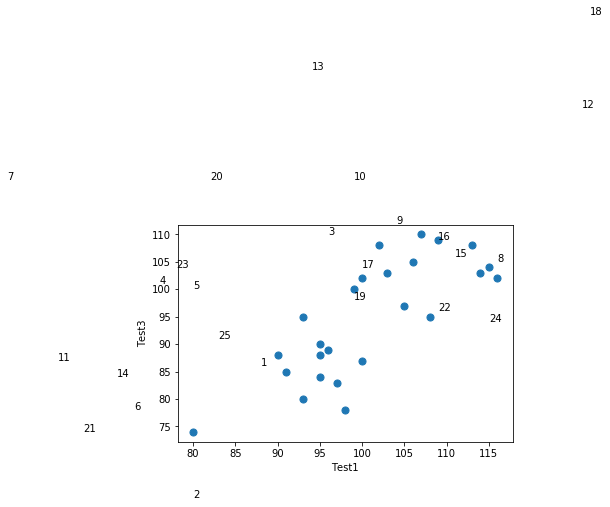

In [117]:
#x1 va x3 Scatter Plot
df_1.plot(x='Test1', y='Test3', kind='scatter', marker='o', s=50)
for i in range(n): 
    plt.text(df.iloc[i,0], df.iloc[i,1], str(i+1))

We calculatd the leverage values for $h_{ii}$ earlier. Recall that the largest leverage values are $h_{7,7} = 0.270959$, $h_{8,8} = 0.209026$, and $h_{14, 14} = 0.229696$. 

Note that the leverage value is 

$$\frac{2p}{n} = \frac{4}{25} = 0.16$$.

Since the two largest leverage values both exceed the criterion of twice the mean leverage values and are separated by a substantial gap from the next largest leverage values which are $h_{16, 16} = 0.180590$ amd $h_{24, 24} = 0.162718$. 

Thus, cases 7, 8, and 14 are outlying $x$ observations as found by using the rule of tumb in the notes. 

## (C3) 

For those outlying cases in C1 & C2 obtain DFFITS, DFBETAS, & Cook's Distance values for these cases to asses their influence. 

What do you conclude??

In (C1), the outlying $y$ observations were Case 19. 

In (C2), the outlying $x$ observations were the following:

  1.) Case 7: $h_{7, 7} = 0.270959$
  
  2.) Case 8: $h_{8, 8} = 0.209026$
   
  3.) Case 14: $h_{14, 14} = 0.229696$

The DFFITS value for the data is as follows.

In [118]:
lm = smf.ols('JobProficiency~Test1+Test3', data=df_1).fit() 
# Use OLSInfluence to find DFFITS:
dffits = OLSInfluence(lm).dffits[0]
print('dffits calculated from OLSInfluence is: ') 
print(dffits)

dffits calculated from OLSInfluence is: 
88.0   86.0     0.077522
80.0   62.0    -0.158041
96.0   110.0   -0.033115
76.0   101.0    0.498297
80.0   100.0    0.001841
73.0   78.0    -0.328906
58.0   120.0   -0.396105
116.0  105.0   -0.014482
104.0  112.0    0.143260
99.0   120.0   -0.352907
64.0   87.0    -0.360572
126.0  133.0    0.024800
94.0   140.0    0.306935
71.0   84.0     0.340976
111.0  106.0   -0.318279
109.0  109.0    0.748315
100.0  104.0   -0.537806
127.0  150.0    0.151498
99.0   98.0     0.251871
82.0   120.0   -0.111226
67.0   74.0     0.543447
109.0  96.0    -0.180128
78.0   104.0   -0.715022
115.0  94.0    -0.008212
83.0   91.0     0.655510
dtype: float64


Thus, $(DFFITS)_7 = -0.3961$

$(DFFITS)_8 = -0.014482$

$(DFFITS)_{14} = 0.340976$

$(DFFITS)_{19} = 0.251871$

A guideline for identifying influential cases for DFFITS, the notes suggest considering a case influential if the absolute value of DFFITS exceeds 1 for small to medium data sets. Thus, none of the cases that we are considering would be considered influential.

Now, we will obtain the DFBETAS values. 

In [119]:
# Use OLSInfluence to find DFBETAS:
dfbetas = OLSInfluence(lm).dfbetas 
print('DFBETAS calculated from OLSInfluence is: ') 
print(dfbetas)

DFBETAS calculated from OLSInfluence is: 
[[ 9.15441883e-03  4.10092897e-02 -5.63355020e-02]
 [-3.16876680e-02  1.03429688e-01 -1.14646884e-01]
 [ 3.81905739e-03  1.39059591e-02 -2.25345720e-02]
 [ 2.75186021e-01 -4.12897988e-01  3.28218113e-01]
 [ 1.13566841e-03 -4.10278540e-04 -2.81087549e-04]
 [-1.70344869e-01 -4.74968770e-02  1.82053539e-01]
 [-3.76434531e-01  2.07864255e-01  2.49607122e-02]
 [ 1.05458243e-02 -1.22446205e-02  6.81288865e-03]
 [-5.07776130e-02 -2.76516475e-02  8.31509994e-02]
 [ 1.23211767e-01 -1.54409305e-01  7.79305044e-02]
 [-2.84328856e-01  2.55968677e-01 -1.14992643e-01]
 [-1.86421218e-02  9.34060985e-03  3.95580619e-03]
 [ 1.68827490e-01 -5.47537980e-02 -4.69991049e-02]
 [ 5.65131539e-02  2.11034420e-01 -3.06446141e-01]
 [ 1.58668515e-01  3.75437535e-02 -1.88420183e-01]
 [-1.52350092e-02 -4.84584332e-01  6.58460219e-01]
 [-6.18702000e-02  3.46071373e-01 -4.17740998e-01]
 [-4.92978836e-02 -5.50166261e-02  1.15677322e-01]
 [-1.14873242e-01  1.99209775e-01 -1.528

For Case 7 the DFBETAS values are as follows: [-3.76434531e-01  2.07864255e-01  2.49607122e-02]

For Case 8: [ 1.05458243e-02 -1.22446205e-02  6.81288865e-03]

For Case 14: [ 5.65131539e-02  2.11034420e-01 -3.06446141e-01]

For Case 19:  [-1.14873242e-01  1.99209775e-01 -1.52852561e-01]

Following the guideline for identifying influential cases from the notes, that we should consider a case influential if the absolute value of DFBETAS exceeds 1 for small for medium data sets (recall that n=25).

Notice that none of the absoulte values of DFBETAS exceeds 1 for any of the DFBETAS values we are considering. Hence, we would consider none of these cases influential.

Now, we will obtain Cook's Distance values:

In [120]:
# Use OLSInfluence to find Cook's distance:
D = OLSInfluence(lm).cooks_distance[0] 
print('Cooks distance calculated from OLSInfluence is: ')
print(D)

Cooks distance calculated from OLSInfluence is: 
88.0   86.0     0.002092
80.0   62.0     0.008616
96.0   110.0    0.000383
76.0   101.0    0.080231
80.0   100.0    0.000001
73.0   78.0     0.035754
58.0   120.0    0.053711
116.0  105.0    0.000073
104.0  112.0    0.007089
99.0   120.0    0.039240
64.0   87.0     0.043307
126.0  133.0    0.000215
94.0   140.0    0.030479
71.0   84.0     0.039860
111.0  106.0    0.034128
109.0  109.0    0.174441
100.0  104.0    0.090048
127.0  150.0    0.007963
99.0   98.0     0.021608
82.0   120.0    0.004279
67.0   74.0     0.090458
109.0  96.0     0.011231
78.0   104.0    0.152094
115.0  94.0     0.000024
83.0   91.0     0.128623
dtype: float64


For Case 7 the Cook's distance value is: $D_7 = 0.053711$

For Case 8: $D_8 = 0.000073$

For Case 14: $D_{14} =  0.030479$

For Case 19: $D_{19} = 0.007963$

We see that Case 7 has the largest $D_i$ value, with the next largest distance measure being $D_14 = 0.030479$, which is not that much smaller than $D_7$. However, the next largest distance measure is $D_19 = 0.007963$, which is much smaller than the other two distances. 

 The ﬁgures below present the information provided by Cook’s distance measure about the inﬂuence of each case in two different plots. Shown in the left ﬁgure is a proportional inﬂuence plot of the residuals $e_i$ against the corresponding ﬁtted values $\hat{y}_i$, the size of the plotted points being proportional to Cook’s distance measure $D_i$. The right ﬁgure resents the information about the Cook’s distance measures in the form of an index inﬂuence plot, where Cook’s distance measure $D_i$ is plotted against the corresponding case index $i$. 

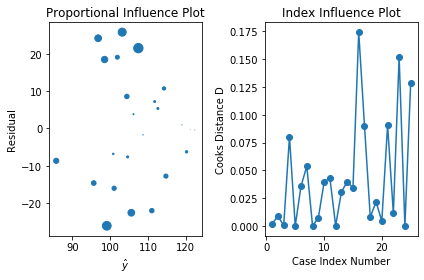

In [121]:
plt.subplot(1,2,1)
sizevalues = np.abs(D)*500 
plt.scatter(lm.fittedvalues, lm.resid, marker='o', s=sizevalues) 
plt.xlabel('$\hat{y}$') 
plt.ylabel('Residual')
plt.title('Proportional Influence Plot')

plt.subplot(1,2,2) 
plt.plot(np.arange(1, n+1), D, 'o-') 
plt.xlabel('Case Index Number')
plt.ylabel('Cooks Distance D') 
plt.title('Index Influence Plot')
plt.tight_layout()

After looking at the graphs we can see that the cases we are considering are considered less influential & cases that we are not considering are very influential.

## (C4)

Obtain the variance inflation factors. 

What do they indicate??

Now, we will obtain the variance inflation factors.

In [122]:
# Get X variables 
X = df[['Test1', 'Test3']].to_numpy()

# Run vif for each predictor:
nparam = 2 
vif = np.zeros(nparam,)

for i in range(nparam): 
    vif[i] = variance_inflation_factor(zscore(X), [i])
    
# print out the results: 
print('{:^10} {:^12}'.format('Variable', '(VIF)k')) 
for i in range(nparam): 
    print('{:^10} {:^12f}'.format('x'+str(i+1), vif[i]))
    
# Find the maximu vif and the mean: 
max_vif = vif.max() 
mean_vif = vif.mean()

print('max vif = ', max_vif) 
print('mean_vif = ', mean_vif)

 Variable     (VIF)k   
    x1       1.033781  
    x2       1.033781  
max vif =  1.033781399684168
mean_vif =  1.033781399684168


It can be see that multicollinearity among the two predictor variables is not a problem.